In [1]:
#pip install allantools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools as at

# Section 1 - CSF steering (Truncated data)

## 1.1 Define functions to use for all step sizes

In [3]:
save_dir = '/eos/user/e/elsweene/SWAN_projects/Filtered_data_sets/'

In [4]:
## Load in CSF data

Zoom_in_CSF = pd.read_csv(save_dir +'Zoom_in_CSF_Data_filtered.csv')

In [5]:
## Assign arrays to columns to allow indexing

Time_CSF_array = np.array(Zoom_in_CSF['TimeStamp'])    
F0_CSF_array = np.array(Zoom_in_CSF['f0'])     

In [6]:
## Define function to cut data to look at first section 

def cut_data_for_fit(number_hrs):
    
    cut_data = Zoom_in_CSF[(Zoom_in_CSF['TimeStamp'])< (Time_CSF_array[0]+ (number_hrs/24))]
    return cut_data

In [7]:
## Define funcction to fit line 

def fit_line(Array_of_interest1,Array_of_interest2,index,numberhrs):
    
    m,b = np.polyfit(Array_of_interest1[index:index+numberhrs],-1*Array_of_interest2[index:index +numberhrs], 1)
    
    return m,b

In [8]:
## Define function with loop to correct data by desired number of hours

def CSF_Correction(loop_range,number_hours):

    i = 0
    F0_CSF_array1= np.array(Zoom_in_CSF['f0'])
    steps = []                                   # store steps to steer GPS data later

    for i in loop_range:

        m,b = fit_line(Time_CSF_array,-1*F0_CSF_array1,i,number_hours)     ## fit to section of data 
        step_f = m*(Time_CSF_array[i+(number_hours-1)]) + b                ## calculate step using fit (removes outliers)

        steps.append(step_f)


        F0_CSF_array1[i:] -= step_f             # add step to all frequencies from this index on
        
        
    return F0_CSF_array1,steps

In [9]:
## Define function to plot steered data against raw data

def plot_steer(step_hrs,shifted_array):
    
    plt.figure(figsize=(15,10))
    
    plot1 = plt.scatter(Time_CSF_array,-1*Zoom_in_CSF['f0'],label='Raw')
    plot2 = plt.scatter(Time_CSF_array,-1*shifted_array,label='Shifted after '+ str(step_hrs) +' hrs')
    
    plt.title('Plot of Fractional Frequency corrected by step every ' +  str(step_hrs) + ' hrs - CSF',fontsize=25)
    plt.xlabel('MJD (days)',fontsize=20)
    plt.ylabel('Fractional Frequency',fontsize=20)

    plt.legend(fontsize=20)
    
    return(plot1,plot2)

In [17]:
## Define function to calculate Allan Deviation and plot

def Allan_Dev(y,rate,t,hrs) : 
    
    (t, ad1, ade, adn) = at.oadev(y, rate, data_type="freq",taus=t)
    
    return plt.loglog(t,ad1,'o',label= str(hrs) +' hrs')

## 1.2 Evaluate for all steps sizes and plot

(<matplotlib.collections.PathCollection at 0x7fd6982a5340>,
 <matplotlib.collections.PathCollection at 0x7fd6982bbb20>)

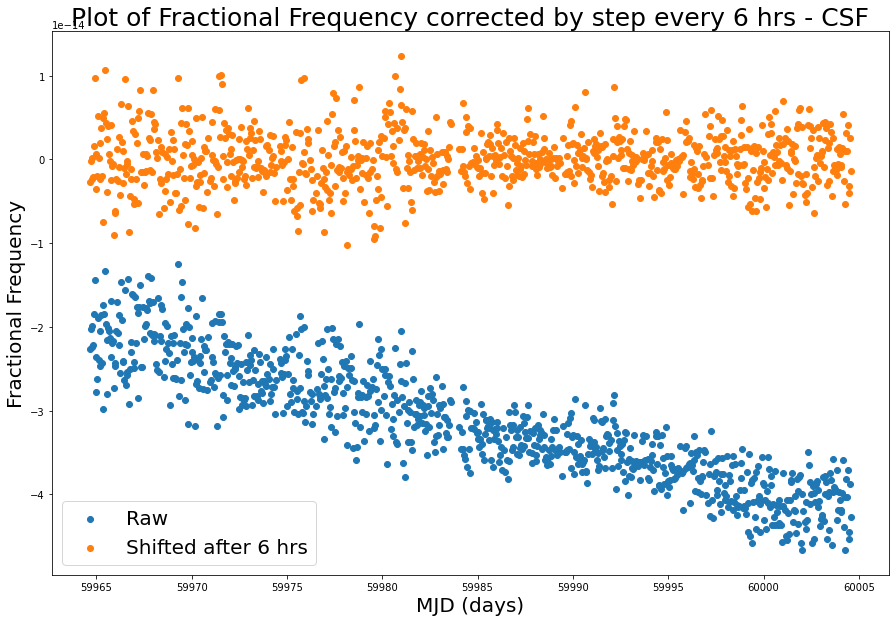

In [12]:
## For 6 hours

(F0_CSF_array6,steps6) = (CSF_Correction(np.arange(0,890,6),6))
plot_steer(6,F0_CSF_array6)

(<matplotlib.collections.PathCollection at 0x7fd6864f1610>,
 <matplotlib.collections.PathCollection at 0x7fd6864cbee0>)

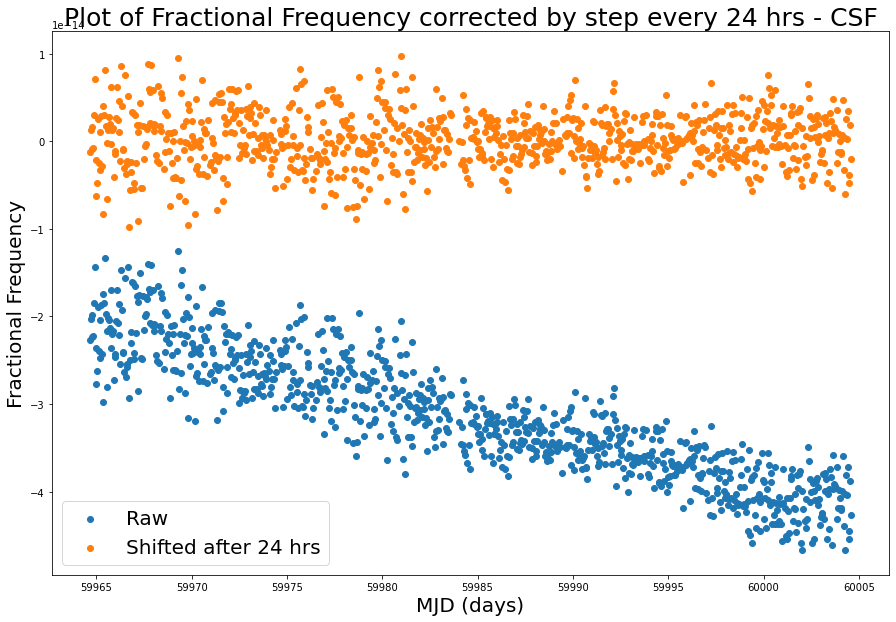

In [13]:
## For 24 hours

(F0_CSF_array24,steps24) = (CSF_Correction(np.arange(0,870,24),24))
plot_steer(24,F0_CSF_array24)

(<matplotlib.collections.PathCollection at 0x7fd69803e160>,
 <matplotlib.collections.PathCollection at 0x7fd6867ead60>)

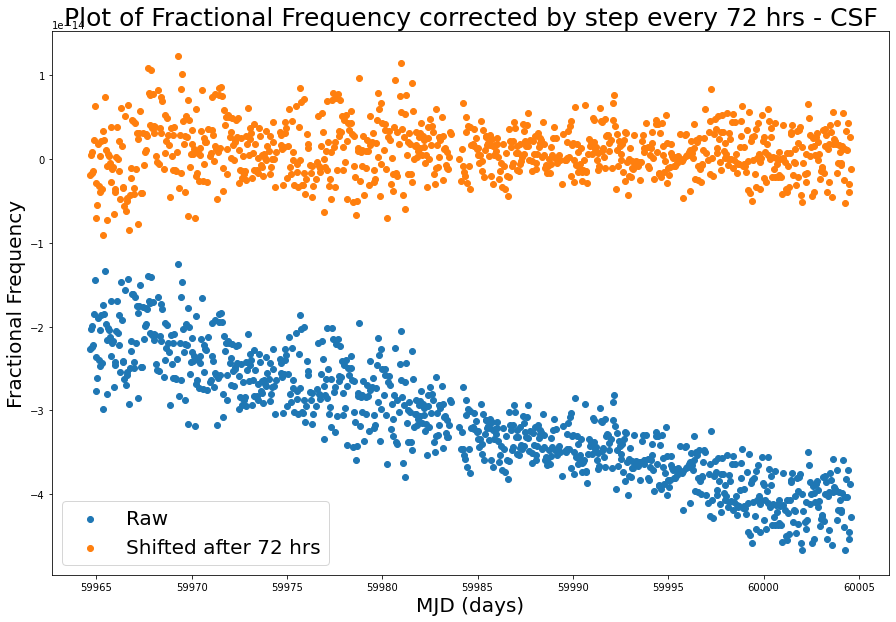

In [14]:
## For 72 hours

(F0_CSF_array72,steps72) = (CSF_Correction(np.arange(0,830,72),72))
plot_steer(72,F0_CSF_array72)

(<matplotlib.collections.PathCollection at 0x7fd68675dc40>,
 <matplotlib.collections.PathCollection at 0x7fd686765580>)

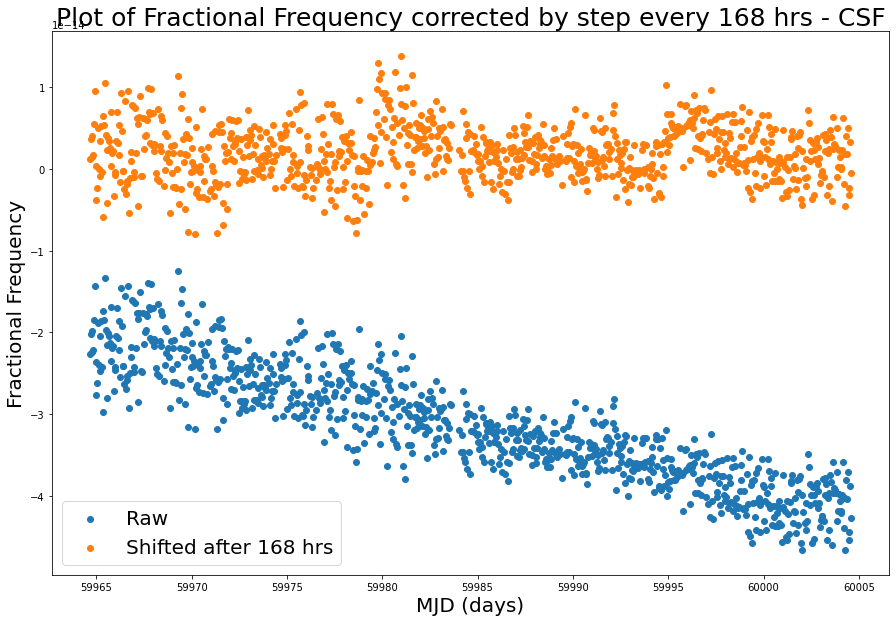

In [15]:
## For 1 week

(F0_CSF_array_week,stepsweek) = (CSF_Correction(np.arange(0,750,168),168))
plot_steer(168,F0_CSF_array_week)

## 1.3 Calculate Allan Deviations for all step sizes

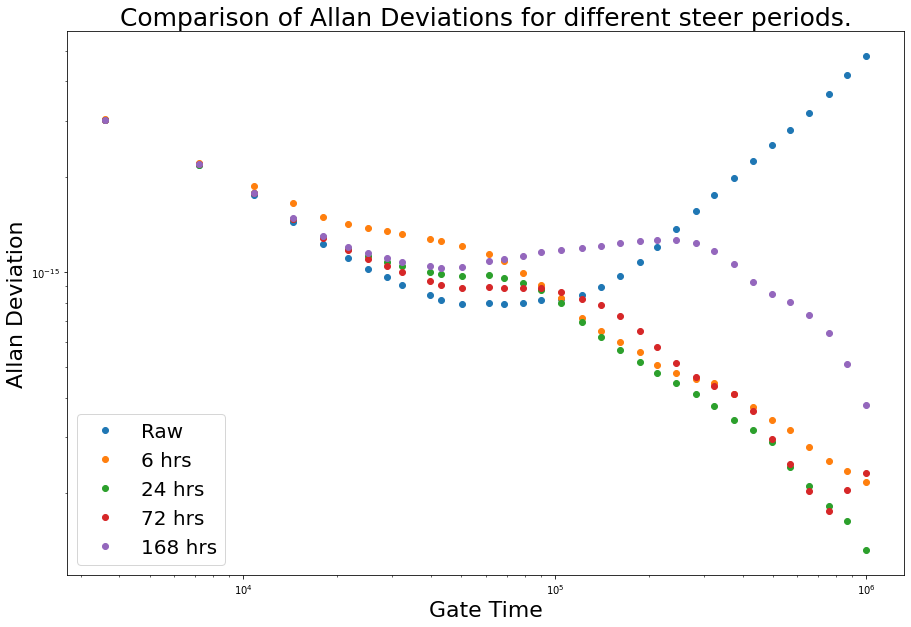

In [19]:
plt.figure(figsize=(15,10))

(t_raw, ad_raw, ade_raw, adn_raw) = at.oadev(np.array(Zoom_in_CSF['f0']),1/3600, data_type="freq",taus=np.logspace(0,6,100))
plt.loglog(t_raw,ad_raw,'o',label='Raw')

AD6 = Allan_Dev(F0_CSF_array6,1/3600,np.logspace(0,6,100),6)
AD24 = Allan_Dev(F0_CSF_array24,1/3600,np.logspace(0,6,100),24)
AD72 = Allan_Dev(F0_CSF_array72,1/3600,np.logspace(0,6,100),72)
AD168 = Allan_Dev(F0_CSF_array_week,1/3600,np.logspace(0,6,100),168)

plt.xlabel('Gate Time', fontsize=22)
plt.ylabel('Allan Deviation', fontsize=22)
plt.title('Comparison of Allan Deviations for different steer periods.',fontsize=25)
plt.legend(fontsize=20)